# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [35]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data
cast = pd.read_csv('data/cast.csv')
title = pd.read_csv('data/titles.csv')
release_dates = pd.read_csv('data/release_dates.csv')

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [3]:
# Assessing the 'cast' DataFrame
print("Assessment of 'cast' DataFrame:")
print("Number of records:", len(cast))
print("Data types:")
print(cast.dtypes)
print("Summary statistics:")
print(cast.describe())
print()

# Assessing the 'title' DataFrame
print("Assessment of 'title' DataFrame:")
print("Number of records:", len(title))
print("Data types:")
print(title.dtypes)
print("Summary statistics:")
print(title.describe())
print()

# Assessing the 'release_date' DataFrame
print("Assessment of 'release_date' DataFrame:")
print("Number of records:", len(release_dates))
print("Data types:")
print(release_dates.dtypes)
print("Summary statistics:")
print(release_dates.describe())


Assessment of 'cast' DataFrame:
Number of records: 3442902
Data types:
title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object
Summary statistics:
               year             n
count  3.442902e+06  2.115119e+06
mean   1.987597e+03  1.673178e+01
std    2.837612e+01  3.209100e+01
min    1.894000e+03  1.000000e+00
25%    1.967000e+03  5.000000e+00
50%    1.999000e+03  1.000000e+01
75%    2.011000e+03  2.100000e+01
max    2.115000e+03  3.361300e+04

Assessment of 'title' DataFrame:
Number of records: 226013
Data types:
title    object
year      int64
dtype: object
Summary statistics:
                year
count  226013.000000
mean     1985.281294
std        29.816257
min      1894.000000
25%      1965.000000
50%      1994.000000
75%      2011.000000
max      2115.000000

Assessment of 'release_date' DataFrame:
Number of records: 443486
Data types:
title      object
year        int64
country    object
dat

All of the three dataframes contain a large number of records, indicating sufficient datasets for analysis.
The 'year' column across all dataframes ranges from 1894 to 2115, which suggests potential data quality issues or outliers, especially for years beyond the current date.
The 'date' column in the 'release_date' dataframe is stored as a string and may require conversion to datetime format for proper analysis.

### 2. How many movies have the title North by Northwest

In [4]:
#Filtering rows with the titles 'North by Northwest'
north_by_northwest_count_titles = title[title['title'].str.contains('North by Northwest', case=False, na=False)].shape[0]

print("Number of movies with titles containing 'North by Northwest':", north_by_northwest_count_titles)


Number of movies with titles containing 'North by Northwest': 1


### 3. How many version of Hamlet are there, when was the first made? the last?

In [5]:
# Filtering rows with titles containing 'Hamlet' and counting how many versions of Hamlet are present 
hamlet_versions = title[title['title'].str.contains('Hamlet', case=False, na= False)]
num_hamlet_versions = len(hamlet_versions)
print("Number of versions of Hamlet:", num_hamlet_versions)

# Year when the first version was released 
first_hamlet_year = hamlet_versions['year'].min()
print("Year of the first version of Hamlet:", first_hamlet_year)

# Year when the last version was released
last_hamlet_year = hamlet_versions['year'].max()
print("Year of the last version of Hamlet:", last_hamlet_year)



Number of versions of Hamlet: 55
Year of the first version of Hamlet: 1910
Year of the last version of Hamlet: 2018


### 4. List all the movies called Treasure Island from oldest to newest

In [7]:
#Filtering rows with titles containing 'Treasure Island'
treasure_island_movies = title[title['title']=='Treasure Island'] 

# Sorting the filtered DataFrame by the 'year' column in ascending order
treasure_island_movies_sorted = treasure_island_movies.sort_values(by='year', ascending=True)

# Printing the list of "Treasure Island" movies from oldest to newest
print("List of movies called Treasure Island from oldest to newest:")
print(treasure_island_movies_sorted)


List of movies called Treasure Island from oldest to newest:
                  title  year
180911  Treasure Island  1918
108853  Treasure Island  1920
87953   Treasure Island  1934
126321  Treasure Island  1950
190233  Treasure Island  1972
122150  Treasure Island  1973
52099   Treasure Island  1985
36752   Treasure Island  1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [20]:
# Counting the number of movies made in 1950, 1980, and 2000
num_movies_1950 = len(title[title['year'] == 1950])
num_movies_1980 = len(title[title['year'] == 1980])
num_movies_2000 = len(title[title['year'] == 2000])

print("Number of movies made in 1950:", num_movies_1950)
print("Number of movies made in 1980:", num_movies_1980)
print("Number of movies made in 2000:", num_movies_2000)

Number of movies made in 1950: 1109
Number of movies made in 1980: 1750
Number of movies made in 2000: 2568


We can see a drastic increase the number of movies made in 2000. That could be because of the advancement in technology, because of awareness and liking towards movies or certain actors or because of sequels of popular movies being made!

### 6. How big was the cast of Metropolis


In [8]:
# Filtering rows where the title is 'Metropolis'
metropolis_cast = cast[(cast['title'] == 'Metropolis')]

# Counting the number of cast members in 'Metropolis'
num_cast_members_metropolis = len(metropolis_cast)

print("Number of cast members in Metropolis:", num_cast_members_metropolis)


Number of cast members in Metropolis: 33


### 7. How many roles for actors were there 1950's? 1990's

In [10]:
# Filtering roles for actors in the 1950's
roles_actors_1950s = cast[(cast['type'] == 'actor') & (cast['year'] >= 1950) & (cast['year'] < 1960)]

# Filter rows for actors in the 1990s
roles_actors_1990s = cast[(cast['type'] == 'actor') & (cast['year'] >= 1990) & (cast['year'] < 2000)]
# Count the number of roles for actors in the 1950's and 1990's
count_roles_actors_1950s = len(roles_actors_1950s)
count_roles_actors_1990s = len(roles_actors_1990s)

# Printing the results
print("Number of roles for actors in the 1950's:", count_roles_actors_1950s)
print("Number of roles for actors in the 1990's:", count_roles_actors_1990s)


Number of roles for actors in the 1950's: 153559
Number of roles for actors in the 1990's: 245713


### 8. How many roles for actors & actresses over time? Output should be a line graph

In [11]:
#Filtering irrelevant data
filtered_cast = cast[cast['year'] <= 2023]

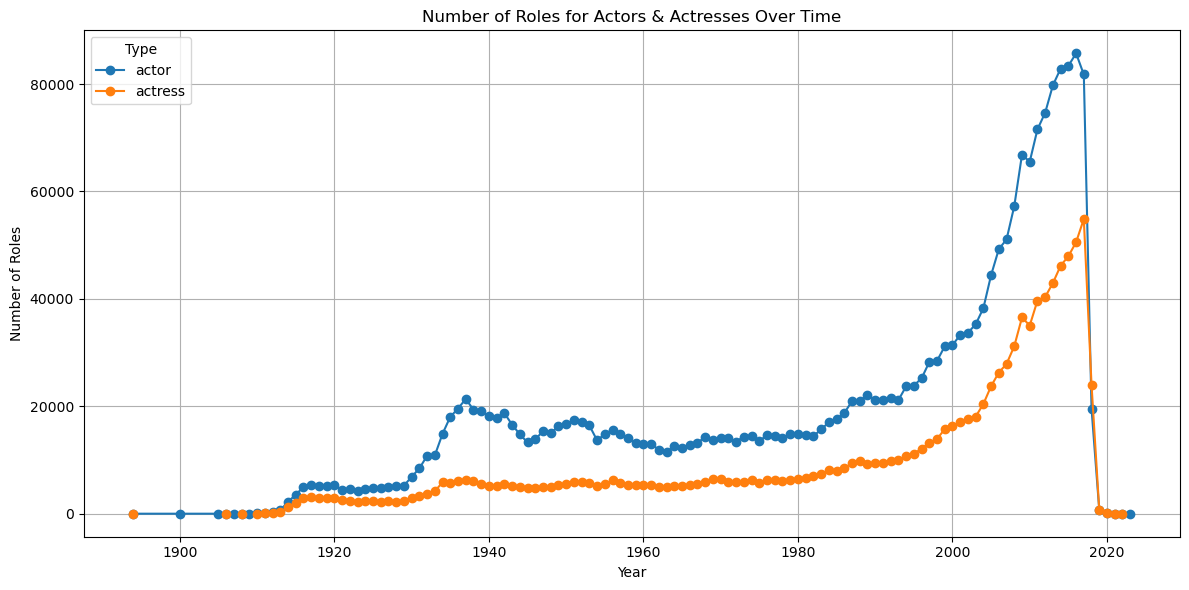

In [12]:
#Grouping the data by 'year' and 'type' and count the number of roles
roles_over_time = filtered_cast.groupby(['year', 'type']).size().unstack()

# Plotting the line graph
roles_over_time.plot(kind='line', marker='o', figsize=(12, 6))

# Adding labels and title
plt.title('Number of Roles for Actors & Actresses Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Roles')

# Display the plot
plt.grid(True)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [13]:
# Filtering rows for leading roles (assuming 'n' represents the billing order)
leading_roles = cast[(cast['year'] >= 2000) & (cast['year'] < 2010) & (cast['n'] == 1) ]

# Printing the DataFrame of leading roles
print(leading_roles)
len(leading_roles)



                                          title  year              name  \
97                       Live Freaky Die Freaky  2006           Nick 13   
137                      Get Rich or Die Tryin'  2005           50 Cent   
257                                       Eeram  2009             Aadhi   
260                                     Mirugam  2007             Aadhi   
574                                 Crazy Jones  2002         Joe Aaron   
...                                         ...   ...               ...   
3442367  Doraemon: Nobita to fushigi kazetsukai  2003      Nobuyo Ôyama   
3442370   Doraemon: Nobita to robotto kingudamu  2002      Nobuyo Ôyama   
3442499              Ich hiess Sabina Spielrein  2002     Eva Österberg   
3442542                                     120  2008       Özge Özberk   
3442747                              Dig og mig  2008  Julie R. Ølgaard   

            type         character    n  
97         actor    TV Reporter #1  1.0  
137        acto

23593

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [14]:
# Filtering roles with NaN ranking in the 1950's
roles_no_ranking_1950s = cast[(cast['year'] == 1950) & (cast['year'] < 1960) & (cast['n'].isna())]

# Filtering roles with NaN ranking in the 2000's
roles_no_ranking_2000s = cast[(cast['year'] >= 2000) & (cast['year'] < 2010) & (cast['n'].isna())]

# Count the number of roles with no ranking in the 1950's and 2000's
count_no_ranking_1950s = len(roles_no_ranking_1950s)
count_no_ranking_2000s = len(roles_no_ranking_2000s)

# Printing the results
print("Number of roles with no ranking in the 1950's:", count_no_ranking_1950s)
print("Number of roles with no ranking in the 2000's:", count_no_ranking_2000s)



Number of roles with no ranking in the 1950's: 11531
Number of roles with no ranking in the 2000's: 232037


According to me, the ranking system started developing after 1950- evolution of categorzing the roles! Or maybe as the industry progressed, the movies were made on a much larger scale with much more cast and crew, hence it could have been challenging to assign ranks.

### 11. Plot the number of films made in each decade

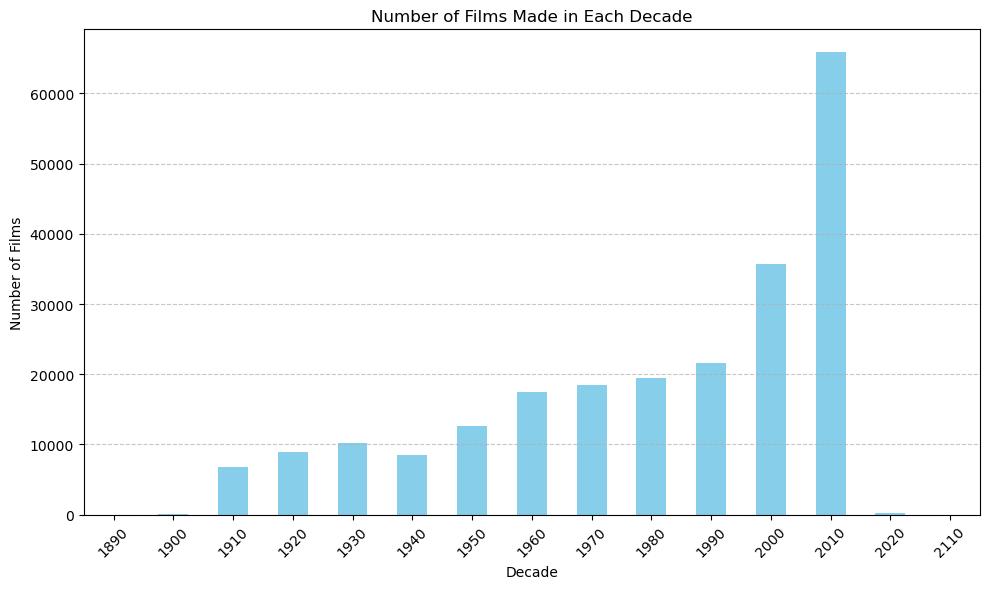

In [16]:
# Extracting the decade from the 'year' column
title['decade'] = (title['year'] // 10) * 10

# Grouping by 'decade' and count the number of films in each decade
films_per_decade = title.groupby('decade').size()

# Plotting the number of films per decade
films_per_decade.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Adding labels and title
plt.title('Number of Films Made in Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')

# Displaying the plot
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 12. Plot the number of films with a Rustler character over time

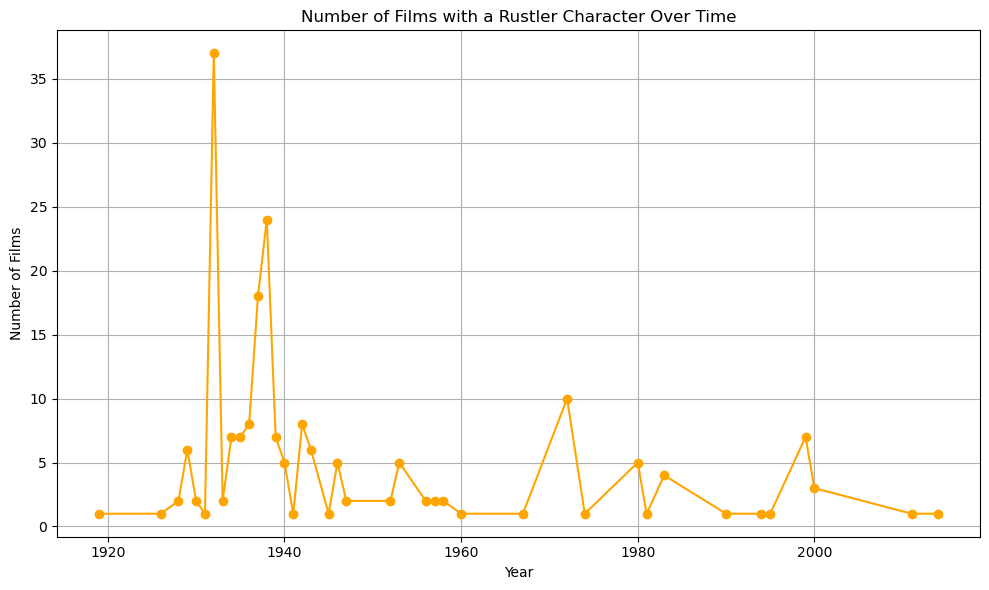

In [17]:
# Filtering rows where the 'character' column contains 'Rustler'
rustler_movies = cast[cast['character'].str.contains('Rustler', case=False, na= False)]

# Grouping by 'year' and count the number of films with a Rustler character for each year
rustler_movies_over_time = rustler_movies.groupby('year').size()

# Plotting the number of films with a Rustler character over time
rustler_movies_over_time.plot(kind='line', marker='o', figsize=(10, 6), color='orange')

# Adding labels and title
plt.title('Number of Films with a Rustler Character Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()


### 13. What are the top ten character names of all time?

In [19]:
#Counting the occurrences of each character name
top_character_names = cast['character'].value_counts().head(10)

# Displaying the top ten character names
print("Top Ten Character Names of All Time:")
print(top_character_names)


Top Ten Character Names of All Time:
character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [20]:
# Filtering rows for the 1990s decade
cast_1990s = cast[(cast['year'] >= 1990) & (cast['year'] < 2000)]

# Counting the occurrences of each actor in the 1990s decade
actor_counts_1990s = cast_1990s['name'].value_counts()

# Identifying the actor with the highest count
actor_most_films_1990s = actor_counts_1990s.idxmax()

# Displaying the actor who appeared in the most films in the 1990s decade
print("Actor who appeared in the most films in the 1990s decade:", actor_most_films_1990s)


Actor who appeared in the most films in the 1990s decade: Shakti Kapoor


### 15. What are the top 10 roles that start with Science?

In [21]:
# Filtering rows where the 'character' column starts with 'Science'
science_roles = cast[cast['character'].str.startswith('Science',na= False)]

# Counting the occurrences of each role
top_science_roles = science_roles['character'].value_counts().head(10)

# Displaying the top 10 roles starting with 'Science'
print("Top 10 roles starting with 'Science':")
print(top_science_roles)


Top 10 roles starting with 'Science':
character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64


### 16. What film has the largest cast

In [22]:
# Grouping the data by film title and count the number of cast members for each film
film_cast_counts = cast.groupby('title').size()

# Finding the film with the largest cast
film_with_largest_cast = film_cast_counts.idxmax()

# Finding the number of cast members for the film with the largest cast
largest_cast_count = film_cast_counts.max()

# Displaying the film with the largest cast and the number of cast members
print(f"The film with the largest cast is '{film_with_largest_cast}' with {largest_cast_count} cast members.")


The film with the largest cast is 'Around the World in 80 Days' with 1364 cast members.


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [23]:
# Calculating descriptive statistics for cast size
cast_size_stats = cast.groupby('title').size().describe()  #cooment 

# Displaying the descriptive statistics
print("Descriptive Statistics for Cast Size:")
print(cast_size_stats)


Descriptive Statistics for Cast Size:
count    168254.000000
mean         20.462491
std          24.206663
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1364.000000
dtype: float64


We can observe that on average there are 21 people in a film as cast members, minimum is a one person cast, which seems very interesting

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [24]:
# Filtering rows where Natalie Portman appears
natalie_portman_films = cast[cast['name'] == 'Natalie Portman']

# Grouping by year and count the number of films for each year
natalie_portman_films_per_year = natalie_portman_films.groupby('year').size()

# Display the number of films Natalie Portman has been in each year
print("Number of films Natalie Portman has been in each year:")
print(natalie_portman_films_per_year)


Number of films Natalie Portman has been in each year:
year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64


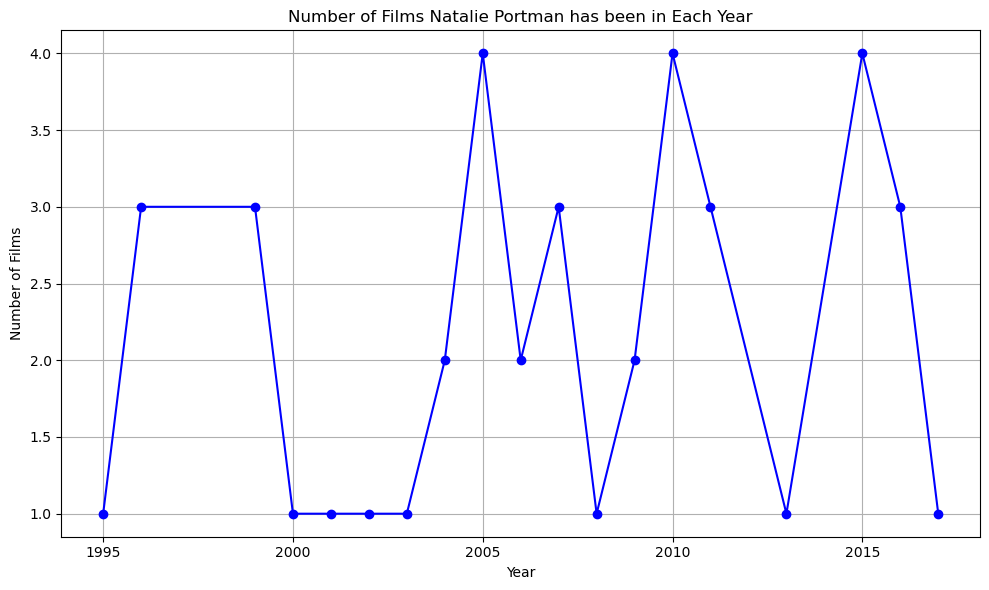

In [25]:
plt.figure(figsize=(10, 6))
natalie_portman_films_per_year.plot(kind='line', marker='o', color='blue')

# Adding labels and title
plt.title('Number of Films Natalie Portman has been in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Films')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [44]:
# Filtering rows where Natalie Portman appears and has a specific role (top star or co-star)
natalie_portman_roles = cast[(cast['name'] == 'Natalie Portman') & ((cast['n'] == 1) | (cast['n'] == 2))]

# Grouping by year and count the number of films for each year
natalie_portman_roles_per_year = natalie_portman_roles.groupby('year').size()

# Displaying the number of films Natalie Portman appeared in each year as top star or co-star
print("Number of films Natalie Portman appeared in each year as top star or co-star:")
print(natalie_portman_roles_per_year)



Number of films Natalie Portman appeared in each year as top star or co-star:
year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64


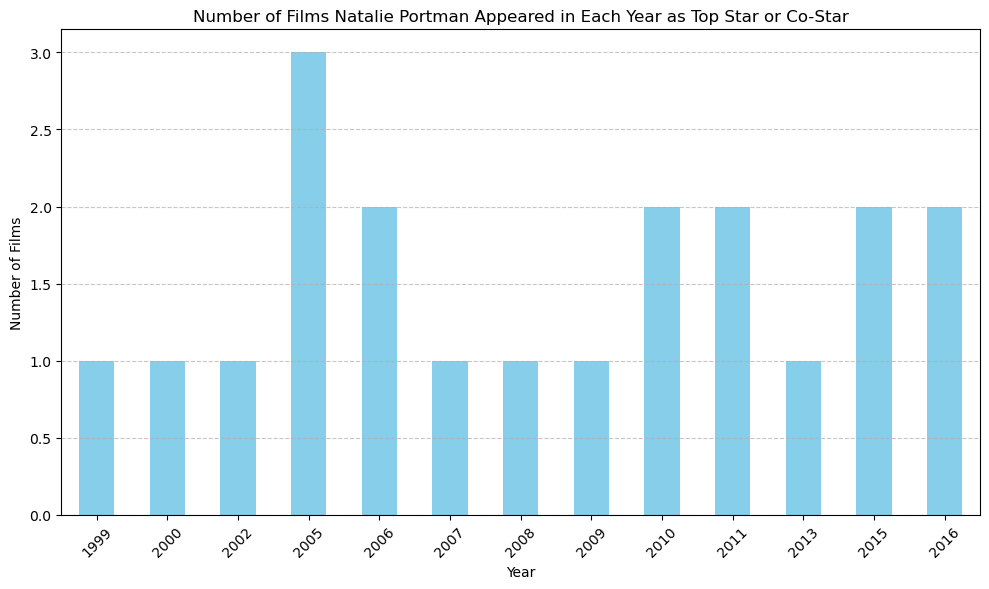

In [27]:
plt.figure(figsize=(10, 6))
natalie_portman_roles_per_year.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Number of Films Natalie Portman Appeared in Each Year as Top Star or Co-Star')
plt.xlabel('Year')
plt.ylabel('Number of Films')

# Display the plot
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 20. Determine how many roles for actor or actress by decade. Plot the output 

C:\Users\cshre\AppData\Local\Temp\ipykernel_47232\1353703736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cast['decade'] = (filtered_cast['year'] // 10) * 10
C:\Users\cshre\AppData\Local\Temp\ipykernel_47232\1353703736.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actors_and_actresses = filtered_cast[(filtered_cast['type'] == 'actor') | (cast['type'] == 'actress')]


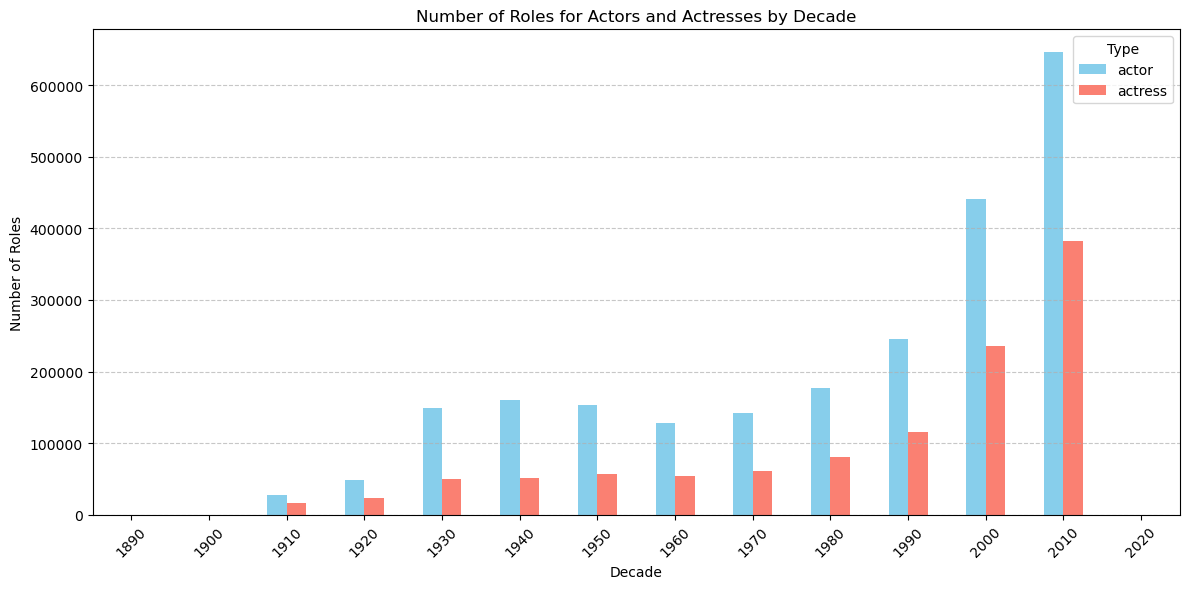

In [46]:
filtered_cast['decade'] = (filtered_cast['year'] // 10) * 10

# Filtering rows for actors and actresses
actors_and_actresses = filtered_cast[(filtered_cast['type'] == 'actor') | (cast['type'] == 'actress')]

# Grouping the data by decade and count the number of roles for each decade
roles_by_decade = actors_and_actresses.groupby(['decade', 'type']).size().unstack()

# Plotting the number of roles for actors and actresses by decade
roles_by_decade.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])

# Adding labels and title
plt.title('Number of Roles for Actors and Actresses by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Type')

# Displaying the plot
plt.tight_layout()
plt.show()


In [47]:
roles_by_decade

type,actor,actress
decade,,
1890,2,1
1900,54,16
1910,27396,15733
1920,48112,23826
1930,149272,49298
1940,159799,50871
1950,153559,56331
1960,128132,54484
1970,142015,60977


### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [30]:
# Converting the 'date' column to datetime format
release_dates['date'] = pd.to_datetime(release_dates['date'])

# Extracting the day of the week and month of release from the 'date' column
release_dates['release_day_of_week'] = release_dates['date'].dt.dayofweek
release_dates['release_month'] = release_dates['date'].dt.month

# Using pivot_table to aggregate data for release day of the week and month
release_pivot = pd.pivot_table(release_dates, index='release_day_of_week', columns='release_month', aggfunc='size')

# Displaying the pivot table
print("Pivot Table for Movie Releases:")
print(release_pivot)


Pivot Table for Movie Releases:
release_month           1      2      3      4      5      6      7      8   \
release_day_of_week                                                           
0                     3699   3138   3383   3168   3050   2337   2267   2844   
1                     1823   1190   1313   1446   1377   1179   1144   1121   
2                     4663   4118   4479   4650   4289   4282   4243   4270   
3                    10746  10356  11844  10625  10100   9469   8947   9931   
4                    13734  13833  15268  13559  13198  11997  11635  13430   
5                     2925   2395   2742   2868   2270   2409   2291   2277   
6                     1822   1277   1228   1358   1165   1031    894   1138   

release_month           9      10     11     12  
release_day_of_week                              
0                     3161   3551   3372   3240  
1                     1309   1542   1415   1903  
2                     4161   4605   4582   5097  
3     

We can see that the most number of releases happened on Fridays(0 is a monday), because thats when the weekend begins. According to me, typically March and September to November are the months after and before Winter respectively. Maybe people get out of the house in these months! 

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

I extracted the day of the week for each release date, hence I was able to plot a heatmap and a line graph showing the monthly trend for it.

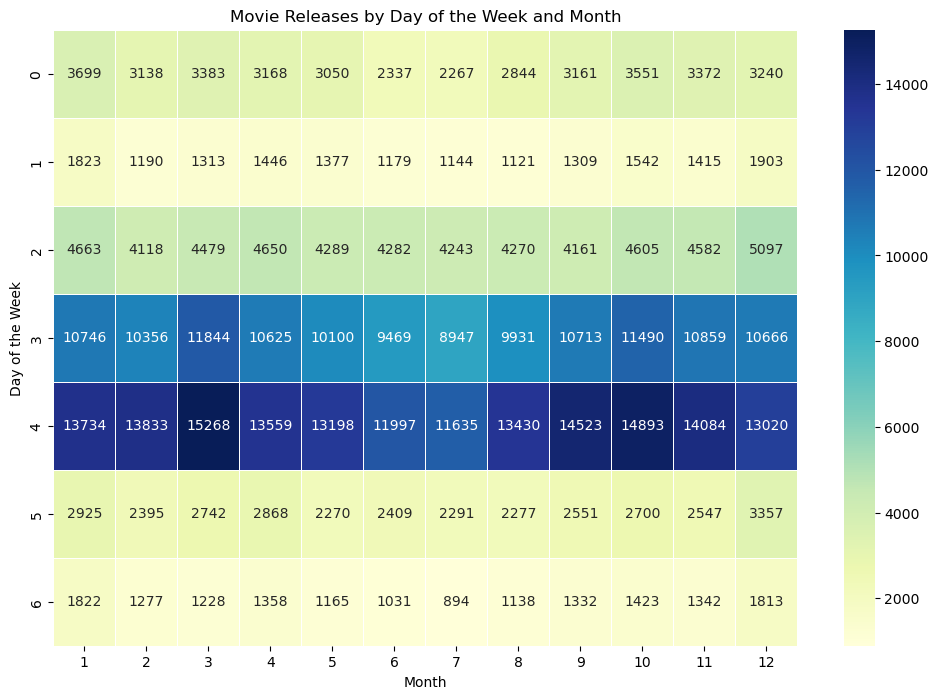

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(release_pivot, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Movie Releases by Day of the Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.show()     

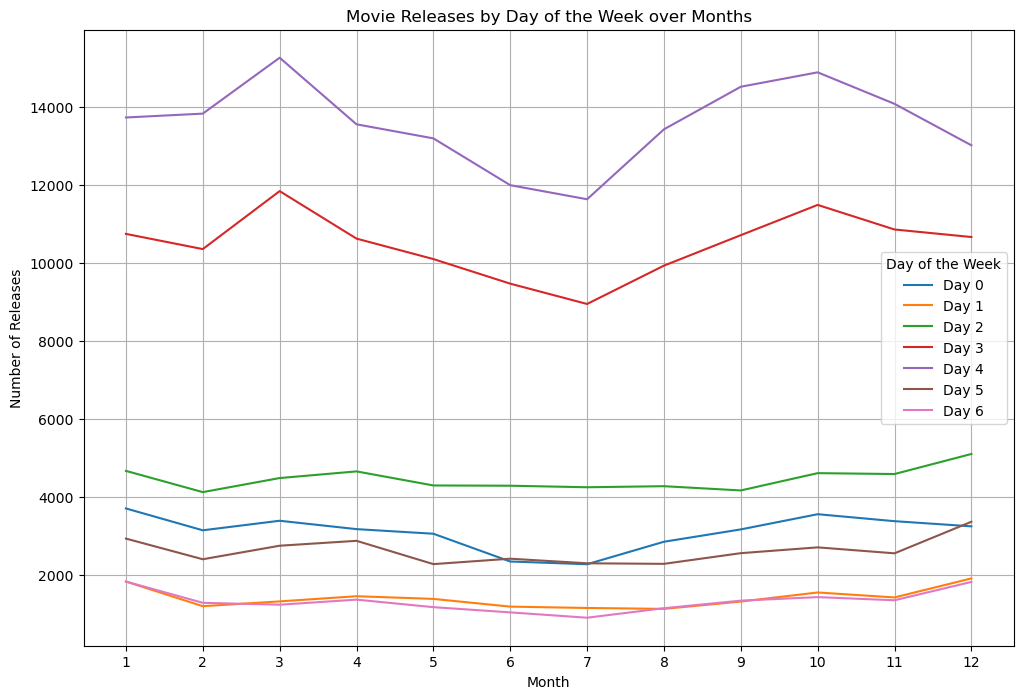

In [42]:
# Plotting the line graph
plt.figure(figsize=(12, 8))

# Plot each day of the week as a line
for day in range(7):
    plt.plot(release_pivot.columns, release_pivot.loc[day], label=f'Day {day}')

plt.title('Movie Releases by Day of the Week over Months')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(range(1, 13))
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

### 23. What films did actors in Star Wars go on to appear in? 

In [54]:
import pandas as pd

# Assuming 'cast' is your DataFrame containing cast information

# Identify the films and unique actors in Star Wars
star_wars_actors = cast[cast['title'] == 'Star Wars']['name'].unique()

# Filter the DataFrame to include only rows where these actors appear
actors_in_other_films = cast[cast['name'].isin(star_wars_actors)]

# Extract the unique films these actors appeared in after Star Wars
films_after_star_wars = actors_in_other_films[~actors_in_other_films['title'].isin(['Star Wars'])]['title'].unique()

# Display the films actors in Star Wars went on to appear in
print("Films actors in Star Wars went on to appear in:")
print(films_after_star_wars)


Films actors in Star Wars went on to appear in:
['Every Little Crook and Nanny' 'Linda Lovelace for President' 'Rogue One'
 'Smorgasbord' 'The Roommates' 'The Sting II' 'The Student Body'
 'The Zebra Force' "Adventures of a Plumber's Mate"
 'Adventures of a Private Eye' 'Adventures of a Taxi Driver'
 'Alfie Darling' 'Big Zapper' 'Eskimo Nell' 'Hennessy'
 'Licensed to Love and Kill' 'The Deadly Females' 'The Fast Kill'
 'The Night My Number Came Up' 'The Swordsman' 'Track the Man Down'
 '24 Hour Party People' 'Amadeus' 'Flash Gordon' 'Labyrinth' 'Mona Lisa'
 'Sleeping Beauty' 'Star Wars: Episode I - The Phantom Menace'
 'Star Wars: Episode II - Attack of the Clones'
 'Star Wars: Episode III - Revenge of the Sith'
 'Star Wars: Episode V - The Empire Strikes Back'
 'Star Wars: Episode VI - Return of the Jedi' 'The Elephant Man'
 'The King and I' 'Time Bandits' 'U.F.O.' 'Willow' 'Wombling Free'
 'American Graffiti' 'Bizarre Devices'
 "Bon Voyage, Charlie Brown (and Don't Come Back!!)" 'Bul